# __Urbanization VS Water stress__
## Measuring the correlation between the two

### Why This Correlation Matters
Understanding the relationship between urbanization and water stress is critical for climate adaptation strategies. Rapid urban growth can strain freshwater resources due to increased domestic, industrial, and infrastructural demand. This insight can help inform urban planning, sustainable development, and policy prioritization for both developed and developing countries.

#### Sample countries: 

Developed: 
- Japan
- USA
- Germany
- United Kingdom
- Australia

Developing: 
- Brazil
- India
- China
- Nigeria
- Pakistan

### Why These Countries Were Chosen
The selected countries represent a mix of economic development levels and global regions, providing a balanced view. They were chosen based on:
- Large populations (e.g., India, China, USA)
- Global influence and varied development stages
- Data availability from the World Bank
- My own personal interest

#### Variables:
- **Urban population (indipendent variable)**: Percentage of population living in urban areas.
- **Water stress levels (dependent variable)**: The ratio of total freshwater withdrawn to the total renewable freshwater resources, factoring in environmental water requirements. [World Bank definition](https://databank.worldbank.org/metadataglossary/world-development-indicators/series/ER.H2O.FWST.ZS)

#### Time period: 
1975 - 2021


### Data Source
All data was sourced from the [World Bank Open Data](https://databank.worldbank.org/source/world-development-indicators). 




## __1. Import relevant libraries__

In [38]:
import pandas as pd
import plotly.graph_objects as go

## __2. Import Datasets__

In [39]:
df = pd.read_csv("Urban population.csv", delimiter=';')

df.head()

Data Source,"World Development Indicators",
0                    Last Updated Date,"2025-04-15",
1  Country Name,"Country Code","Indicator Name","...
2  Aruba,"ABW","Urban population","SP.URB.TOTL","...
3  Africa Eastern and Southern,"AFE","Urban popul...
4  Afghanistan,"AFG","Urban population","SP.URB.T...

In [40]:
df = pd.read_csv("Urban population.csv", skiprows=4)  # Adjust number as needed

df.head()

Country Name Country Code    Indicator Name Indicator Code  \
0                        Aruba          ABW  Urban population    SP.URB.TOTL   
1  Africa Eastern and Southern          AFE  Urban population    SP.URB.TOTL   
2                  Afghanistan          AFG  Urban population    SP.URB.TOTL   
3   Africa Western and Central          AFW  Urban population    SP.URB.TOTL   
4                       Angola          AGO  Urban population    SP.URB.TOTL   

         1960        1961        1962        1963        1964        1965  \
0     27887.0     28212.0     28580.0     28917.0     29221.0     29502.0   
1  18960189.0  19796785.0  20690699.0  21653526.0  22685293.0  23779650.0   
2    759034.0    800151.0    844139.0    890912.0    940801.0    993966.0   
3  14361518.0  15050171.0  15775196.0  16550889.0  17374634.0  18251823.0   
4    545923.0    572465.0    599897.0    628663.0    658872.0    690469.0   

   ...         2016         2017         2018         2019         2020  \
0  ...      46961.0      47075.0      47278.0      47554.0      47449.0   
1  ...  217677754.0  226557045.0  236107161.0  245939557.0  256139740.0   
2  ...    8682093.0    9011456.0    9367638.0    9749465.0   10168092.0   
3  ...  195289605.0  203221168.0  211219592.0  219276647.0  227465935.0   
4  ...   18720648.0   19603967.0   20504018.0   21425222.0   22353719.0   

          2021         2022         2023  2024  Unnamed: 69  
0      47244.0      47272.0      47511.0   NaN          NaN  
1  266650602.0  277426261.0  288380305.0   NaN          NaN  
2   10525708.0   10800465.0   11165011.0   NaN          NaN  
3  235827038.0  244365364.0  253228069.0   NaN          NaN  
4   23295577.0   24260684.0   25242775.0   NaN          NaN  

[5 rows x 70 columns]

In [41]:
urban_df = pd.read_csv("Urban population.csv", engine='python', skiprows=4)

df.head()

Country Name Country Code    Indicator Name Indicator Code  \
0                        Aruba          ABW  Urban population    SP.URB.TOTL   
1  Africa Eastern and Southern          AFE  Urban population    SP.URB.TOTL   
2                  Afghanistan          AFG  Urban population    SP.URB.TOTL   
3   Africa Western and Central          AFW  Urban population    SP.URB.TOTL   
4                       Angola          AGO  Urban population    SP.URB.TOTL   

         1960        1961        1962        1963        1964        1965  \
0     27887.0     28212.0     28580.0     28917.0     29221.0     29502.0   
1  18960189.0  19796785.0  20690699.0  21653526.0  22685293.0  23779650.0   
2    759034.0    800151.0    844139.0    890912.0    940801.0    993966.0   
3  14361518.0  15050171.0  15775196.0  16550889.0  17374634.0  18251823.0   
4    545923.0    572465.0    599897.0    628663.0    658872.0    690469.0   

   ...         2016         2017         2018         2019         2020  \
0  ...      46961.0      47075.0      47278.0      47554.0      47449.0   
1  ...  217677754.0  226557045.0  236107161.0  245939557.0  256139740.0   
2  ...    8682093.0    9011456.0    9367638.0    9749465.0   10168092.0   
3  ...  195289605.0  203221168.0  211219592.0  219276647.0  227465935.0   
4  ...   18720648.0   19603967.0   20504018.0   21425222.0   22353719.0   

          2021         2022         2023  2024  Unnamed: 69  
0      47244.0      47272.0      47511.0   NaN          NaN  
1  266650602.0  277426261.0  288380305.0   NaN          NaN  
2   10525708.0   10800465.0   11165011.0   NaN          NaN  
3  235827038.0  244365364.0  253228069.0   NaN          NaN  
4   23295577.0   24260684.0   25242775.0   NaN          NaN  

[5 rows x 70 columns]

### Water stress

In [42]:
water_df = pd.read_csv("Water stress.csv", engine='python', skiprows=4)

water_df.head()

Country Name Country Code  \
0                        Aruba          ABW   
1  Africa Eastern and Southern          AFE   
2                  Afghanistan          AFG   
3   Africa Western and Central          AFW   
4                       Angola          AGO   

                                      Indicator Name  Indicator Code  1960  \
0  Level of water stress: freshwater withdrawal a...  ER.H2O.FWST.ZS   NaN   
1  Level of water stress: freshwater withdrawal a...  ER.H2O.FWST.ZS   NaN   
2  Level of water stress: freshwater withdrawal a...  ER.H2O.FWST.ZS   NaN   
3  Level of water stress: freshwater withdrawal a...  ER.H2O.FWST.ZS   NaN   
4  Level of water stress: freshwater withdrawal a...  ER.H2O.FWST.ZS   NaN   

   1961  1962  1963  1964  1965  ...       2016       2017       2018  \
0   NaN   NaN   NaN   NaN   NaN  ...        NaN        NaN        NaN   
1   NaN   NaN   NaN   NaN   NaN  ...        NaN        NaN        NaN   
2   NaN   NaN   NaN   NaN   NaN  ...  54.757019  54.757019  54.757019   
3   NaN   NaN   NaN   NaN   NaN  ...        NaN        NaN        NaN   
4   NaN   NaN   NaN   NaN   NaN  ...   1.871883   1.871883   1.871883   

        2019       2020       2021  2022  2023  2024  Unnamed: 69  
0        NaN        NaN        NaN   NaN   NaN   NaN          NaN  
1        NaN        NaN        NaN   NaN   NaN   NaN          NaN  
2  54.757019  54.757019  54.757019   NaN   NaN   NaN          NaN  
3        NaN        NaN        NaN   NaN   NaN   NaN          NaN  
4   1.871883   1.871883   1.871883   NaN   NaN   NaN          NaN  

[5 rows x 70 columns]

In [43]:
print(urban_df.columns)
print(water_df.columns)

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022',
       '2023', '2024', 'Unnamed: 69'],
      dtype='object')
Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',

## __3. Clean Datasets__
#### Steps: 
1. Fliter relevent variables
2. Turn dataset into long
5. Filter countries
6. Identify and drop missing variables
7. Align datasets & Merge!




### __Urban population__

### 1. Fliter relevent variables

In [44]:
urban_filtered = urban_df[['Country Name',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022',
       '2023', '2024']]
urban_filtered.head()

Country Name        1960        1961        1962  \
0                        Aruba     27887.0     28212.0     28580.0   
1  Africa Eastern and Southern  18960189.0  19796785.0  20690699.0   
2                  Afghanistan    759034.0    800151.0    844139.0   
3   Africa Western and Central  14361518.0  15050171.0  15775196.0   
4                       Angola    545923.0    572465.0    599897.0   

         1963        1964        1965        1966        1967        1968  \
0     28917.0     29221.0     29502.0     29749.0     29890.0     29921.0   
1  21653526.0  22685293.0  23779650.0  24937906.0  26161037.0  27457447.0   
2    890912.0    940801.0    993966.0   1050560.0   1110480.0   1174441.0   
3  16550889.0  17374634.0  18251823.0  19144135.0  20088012.0  21089075.0   
4    628663.0    658872.0    690469.0    723627.0    758315.0    794500.0   

   ...         2015         2016         2017         2018         2019  \
0  ...      46516.0      46961.0      47075.0      47278.0      47554.0   
1  ...  209137457.0  217677754.0  226557045.0  236107161.0  245939557.0   
2  ...    8391292.0    8682093.0    9011456.0    9367638.0    9749465.0   
3  ...  187526571.0  195289605.0  203221168.0  211219592.0  219276647.0   
4  ...   17864997.0   18720648.0   19603967.0   20504018.0   21425222.0   

          2020         2021         2022         2023  2024  
0      47449.0      47244.0      47272.0      47511.0   NaN  
1  256139740.0  266650602.0  277426261.0  288380305.0   NaN  
2   10168092.0   10525708.0   10800465.0   11165011.0   NaN  
3  227465935.0  235827038.0  244365364.0  253228069.0   NaN  
4   22353719.0   23295577.0   24260684.0   25242775.0   NaN  

[5 rows x 66 columns]

### 2. Turn dataset into long

In [45]:

urban_long = urban_filtered.melt(
    id_vars='Country Name',        # keep 'Country' column as-is
    var_name='Year',          # new column to hold the years
    value_name='Urban Population'         # new column to hold pollution values
)

# Step 3: Convert the Year column from string to integer (optional but useful)
urban_long['Year'] = urban_long['Year'].astype(int)

# Step 4: Preview the reshaped data
print(urban_long.head())
print(urban_long.tail())


                  Country Name  Year  Urban Population
0                        Aruba  1960           27887.0
1  Africa Eastern and Southern  1960        18960189.0
2                  Afghanistan  1960          759034.0
3   Africa Western and Central  1960        14361518.0
4                       Angola  1960          545923.0
       Country Name  Year  Urban Population
17285        Kosovo  2024               NaN
17286   Yemen, Rep.  2024               NaN
17287  South Africa  2024               NaN
17288        Zambia  2024               NaN
17289      Zimbabwe  2024               NaN


### 3. filter countries 

In [46]:
selected_countries = ['Japan', 'United States', 'Germany', 'United Kingdom', 'Australia', 
                      'Brazil', 'India', 'China', 'Nigeria', 'Pakistan']

urban_filtered = urban_long[urban_long['Country Name'].isin(selected_countries)]

urban_filtered.head()
urban_filtered.tail()

Country Name  Year  Urban Population
17133          India  2024               NaN
17143          Japan  2024               NaN
17198        Nigeria  2024               NaN
17208       Pakistan  2024               NaN
17275  United States  2024               NaN

#### 4. Identify and drop missing variables

In [47]:
print(urban_filtered.isnull().sum())

Country Name         0
Year                 0
Urban Population    10
dtype: int64


In [48]:
#see missing rows

print(urban_filtered[urban_filtered.isnull().any(axis=1)])

         Country Name  Year  Urban Population
17037       Australia  2024               NaN
17053          Brazil  2024               NaN
17064           China  2024               NaN
17079         Germany  2024               NaN
17105  United Kingdom  2024               NaN
17133           India  2024               NaN
17143           Japan  2024               NaN
17198         Nigeria  2024               NaN
17208        Pakistan  2024               NaN
17275   United States  2024               NaN


In [49]:
# drop rows with missing values
urban_clean = urban_filtered.dropna()

urban_clean.isnull().sum()

Country Name        0
Year                0
Urban Population    0
dtype: int64

## Water stress
### 1. Fliter relevent variables

In [50]:
water_filtered = water_df[['Country Name',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022',
       '2023', '2024']]
water_filtered.head()

Country Name  1960  1961  1962  1963  1964  1965  1966  \
0                        Aruba   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1  Africa Eastern and Southern   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2                  Afghanistan   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
3   Africa Western and Central   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
4                       Angola   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

   1967  1968  ...       2015       2016       2017       2018       2019  \
0   NaN   NaN  ...        NaN        NaN        NaN        NaN        NaN   
1   NaN   NaN  ...        NaN        NaN        NaN        NaN        NaN   
2   NaN   NaN  ...  54.757019  54.757019  54.757019  54.757019  54.757019   
3   NaN   NaN  ...        NaN        NaN        NaN        NaN        NaN   
4   NaN   NaN  ...   1.871883   1.871883   1.871883   1.871883   1.871883   

        2020       2021  2022  2023  2024  
0        NaN        NaN   NaN   NaN   NaN  
1        NaN        NaN   NaN   NaN   NaN  
2  54.757019  54.757019   NaN   NaN   NaN  
3        NaN        NaN   NaN   NaN   NaN  
4   1.871883   1.871883   NaN   NaN   NaN  

[5 rows x 66 columns]

### 2. make into long

In [51]:

water_long = water_filtered.melt(
    id_vars='Country Name',        # keep 'Country' column as-is
    var_name='Year',          # new column to hold the years
    value_name='Water Stress'         # new column to hold pollution values
)

# Step 3: Convert the Year column from string to integer (optional but useful)
water_long['Year'] = water_long['Year'].astype(int)

# Step 4: Preview the reshaped data
print(water_long.head())
print(water_long.tail())


                  Country Name  Year  Water Stress
0                        Aruba  1960           NaN
1  Africa Eastern and Southern  1960           NaN
2                  Afghanistan  1960           NaN
3   Africa Western and Central  1960           NaN
4                       Angola  1960           NaN
       Country Name  Year  Water Stress
17285        Kosovo  2024           NaN
17286   Yemen, Rep.  2024           NaN
17287  South Africa  2024           NaN
17288        Zambia  2024           NaN
17289      Zimbabwe  2024           NaN


#### 3. Select countries

In [52]:
water_filtered = water_long[water_long['Country Name'].isin(selected_countries)]

print(urban_filtered.head())
print(urban_filtered.tail())

      Country Name  Year  Urban Population
13       Australia  1960         8378309.0
29          Brazil  1960        33399157.0
40           China  1960       108085352.0
55         Germany  1960        51978188.0
81  United Kingdom  1960        41104656.0
        Country Name  Year  Urban Population
17133          India  2024               NaN
17143          Japan  2024               NaN
17198        Nigeria  2024               NaN
17208       Pakistan  2024               NaN
17275  United States  2024               NaN


#### 4. Identify and drop missing variables

In [53]:
water_filtered.info

<bound method DataFrame.info of          Country Name  Year  Water Stress
13          Australia  1960           NaN
29             Brazil  1960           NaN
40              China  1960           NaN
55            Germany  1960           NaN
81     United Kingdom  1960           NaN
...               ...   ...           ...
17133           India  2024           NaN
17143           Japan  2024           NaN
17198         Nigeria  2024           NaN
17208        Pakistan  2024           NaN
17275   United States  2024           NaN

[650 rows x 3 columns]>

In [54]:
print(water_filtered.isnull().sum())

Country Name      0
Year              0
Water Stress    258
dtype: int64


In [55]:
#see missing rows

print(water_filtered[water_filtered.isnull().any(axis=1)])

         Country Name  Year  Water Stress
13          Australia  1960           NaN
29             Brazil  1960           NaN
40              China  1960           NaN
55            Germany  1960           NaN
81     United Kingdom  1960           NaN
...               ...   ...           ...
17133           India  2024           NaN
17143           Japan  2024           NaN
17198         Nigeria  2024           NaN
17208        Pakistan  2024           NaN
17275   United States  2024           NaN

[258 rows x 3 columns]


In [56]:
# drop rows with missing values
water_clean = water_filtered.dropna()

water_clean.isnull().sum()

Country Name    0
Year            0
Water Stress    0
dtype: int64

In [57]:
water_clean.info

<bound method DataFrame.info of         Country Name  Year  Water Stress
4099           India  1975     39.022387
4174        Pakistan  1975     94.085025
4365           India  1976     40.220785
4440        Pakistan  1976     94.170603
4631           India  1977     41.419183
...              ...   ...           ...
16335          India  2021     66.492093
16345          Japan  2021     36.045977
16400        Nigeria  2021      9.668217
16410       Pakistan  2021    162.069812
16477  United States  2021     28.161984

[392 rows x 3 columns]>

#### 5. Align datasets and merge!

In [58]:
# Get unique countries and years in each dataset
urban_countries = set(urban_clean['Country Name'].unique())
water_countries = set(water_clean['Country Name'].unique())

urban_years = set(urban_clean['Year'].unique())
water_years = set(water_clean['Year'].unique())

# Find intersection
common_countries = urban_countries.intersection(water_countries)
common_years = urban_years.intersection(water_years)

print(urban_clean.head())
print(water_clean.head())

      Country Name  Year  Urban Population
13       Australia  1960         8378309.0
29          Brazil  1960        33399157.0
40           China  1960       108085352.0
55         Germany  1960        51978188.0
81  United Kingdom  1960        41104656.0
     Country Name  Year  Water Stress
4099        India  1975     39.022387
4174     Pakistan  1975     94.085025
4365        India  1976     40.220785
4440     Pakistan  1976     94.170603
4631        India  1977     41.419183


In [59]:
urban_aligned = urban_clean[
    (urban_clean['Country Name'].isin(common_countries)) &
    (urban_clean['Year'].isin(common_years))
]

water_aligned = water_clean[
    (water_clean['Country Name'].isin(common_countries)) &
    (water_clean['Year'].isin(common_years))
]

print(urban_aligned.head(10))
print(water_aligned.head(10))

        Country Name  Year  Urban Population
4003       Australia  1975        11780153.0
4019          Brazil  1975        65420857.0
4030           China  1975       159452730.0
4045         Germany  1975        57085531.0
4071  United Kingdom  1975        43677888.0
4099           India  1975       130404550.0
4109           Japan  1975        84478613.0
4164         Nigeria  1975        12542659.0
4174        Pakistan  1975        18296768.0
4241   United States  1975       159070594.0
     Country Name  Year  Water Stress
4099        India  1975     39.022387
4174     Pakistan  1975     94.085025
4365        India  1976     40.220785
4440     Pakistan  1976     94.170603
4631        India  1977     41.419183
4706     Pakistan  1977     94.256181
4897        India  1978     42.617581
4972     Pakistan  1978     94.341758
5163        India  1979     43.815979
5238     Pakistan  1979     94.427336


In [60]:
merged_df = pd.merge(
    urban_aligned,
    water_aligned,
    on=['Country Name', 'Year'],
    how='inner'
)

merged_df.isnull().sum()
merged_df

Country Name  Year  Urban Population  Water Stress
0            India  1975       130404550.0     39.022387
1         Pakistan  1975        18296768.0     94.085025
2            India  1976       135668080.0     40.220785
3         Pakistan  1976        19109000.0     94.170603
4            India  1977       141142851.0     41.419183
..             ...   ...               ...           ...
387          India  2021       500529185.0     66.492093
388          Japan  2021       115459909.0     36.045977
389        Nigeria  2021       115265457.0      9.668217
390       Pakistan  2021        89660489.0    162.069812
391  United States  2021       275178949.0     28.161984

[392 rows x 4 columns]

In [61]:
#final check 
print(merged_df.info())          # Check for data types and final NaNs
print(merged_df.describe())      # Get a sense of the value ranges
print(merged_df.isnull().sum())  # Confirm all NaNs are gone

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country Name      392 non-null    object 
 1   Year              392 non-null    int64  
 2   Urban Population  392 non-null    float64
 3   Water Stress      392 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 12.4+ KB
None
              Year  Urban Population  Water Stress
count   392.000000      3.920000e+02    392.000000
mean   2001.441327      1.588393e+08     38.738803
std      12.062142      1.657237e+08     31.067160
min    1975.000000      1.501727e+07      1.464113
25%    1992.000000      4.977507e+07      9.668217
50%    2002.000000      9.847007e+07     35.825506
75%    2012.000000      2.095660e+08     51.226638
max    2021.000000      8.828945e+08    162.069812
Country Name        0
Year                0
Urban Population    0
Water Stress        0

## __4. Visualization__
### 4.1 line chart (time series) 
    ... see change in water stress and urban population over time.
    there will be two interactive charts: 
- developed countries
- developing countries

#### Steps: 
1. Distinguish developing vs developed
2. Normalize variables
3. Split the Dataset by Group
4. Create Interactive Plot
5. Refine Plot

### 4.2 Scatter plot (for correlation)
    ... Identify correlation between urban population and water stress. Tha graph will be for each year and each dot will represent a country. You can move throgh the years with the slider.

1. Distinguish developing vs developed (same as above)
2. Create ne Scatter Plot per Year
3. Create Interactive Plot
4. Add a Slider
5. Refine Plot

### 4.1 line chart
#### 1. Distinguish developing vs developed

In [62]:
developed = ['Japan', 'United States', 'Germany', 'United Kingdom', 'Australia']
developing = [ 'Brazil', 'India', 'China', 'Nigeria', 'Pakistan']

merged_df['Group'] = merged_df['Country Name'].apply(
    lambda x: 'Developed' if x in developed else 'Developing'
)

merged_df

Country Name  Year  Urban Population  Water Stress       Group
0            India  1975       130404550.0     39.022387  Developing
1         Pakistan  1975        18296768.0     94.085025  Developing
2            India  1976       135668080.0     40.220785  Developing
3         Pakistan  1976        19109000.0     94.170603  Developing
4            India  1977       141142851.0     41.419183  Developing
..             ...   ...               ...           ...         ...
387          India  2021       500529185.0     66.492093  Developing
388          Japan  2021       115459909.0     36.045977   Developed
389        Nigeria  2021       115265457.0      9.668217  Developing
390       Pakistan  2021        89660489.0    162.069812  Developing
391  United States  2021       275178949.0     28.161984   Developed

[392 rows x 5 columns]

#### 2. Normalize values

In [63]:
def normalize(group):
    # Normalize Urban Population
    group['Urban_Scaled'] = (group['Urban Population'] - group['Urban Population'].min()) / (group['Urban Population'].max() - group['Urban Population'].min())

    # Normalize Water Stress
    group['Water_Scaled'] = (group['Water Stress'] - group['Water Stress'].min()) / (group['Water Stress'].max() - group['Water Stress'].min())

    return group

# This function:
# Takes one country’s data at a time (group)
# Applies min-max normalization to both variables
# Adds two new columns: 'Urban_Scaled' and 'Water_Scaled'

merged_df = merged_df.groupby('Country Name').apply(normalize).reset_index(drop=True)

# What this does:
# Breaks your data into chunks per country
# Applies the normalize() function to each chunk
# Resets the index to keep it clean

/var/folders/4w/_l888jr17kggwhk1765hn59h0000gn/T/ipykernel_2366/4144589928.py:15: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



In [64]:
print(merged_df[['Country Name', 'Year', 'Urban Population', 'Urban_Scaled', 'Water Stress', 'Water_Scaled', 'Group']].head())


  Country Name  Year  Urban Population  Urban_Scaled  Water Stress  \
0    Australia  1993        15017273.0      0.000000      7.458866   
1    Australia  1994        15139633.0      0.017077      8.488219   
2    Australia  1995        15285785.0      0.037475      7.981584   
3    Australia  1996        15448588.0      0.060196      8.910414   
4    Australia  1997        15592522.0      0.080284      8.817129   

   Water_Scaled      Group  
0      0.732398  Developed  
1      0.922166  Developed  
2      0.828765  Developed  
3      1.000000  Developed  
4      0.982802  Developed  


In [65]:
#Yay

In [66]:
# Split the dataframe into two based on group
dev_df = merged_df[merged_df['Group'] == 'Developed']
deving_df = merged_df[merged_df['Group'] == 'Developing']

deving_df.tail(10)

Country Name  Year  Urban Population  Water Stress       Group  \
298     Pakistan  2012        73530776.0    115.256733  Developing   
299     Pakistan  2013        75169776.0    112.569781  Developing   
300     Pakistan  2014        76747454.0    119.544813  Developing   
301     Pakistan  2015        78281214.0    120.790136  Developing   
302     Pakistan  2016        79765118.0    122.550764  Developing   
303     Pakistan  2017        81365499.0    122.673456  Developing   
304     Pakistan  2018        83205748.0    118.238145  Developing   
305     Pakistan  2019        85181688.0    108.649776  Developing   
306     Pakistan  2020        87338399.0    116.305748  Developing   
307     Pakistan  2021        89660489.0    162.069812  Developing   

     Urban_Scaled  Water_Scaled  
298      0.773979      0.311418  
299      0.796946      0.271895  
300      0.819053      0.374492  
301      0.840545      0.392810  
302      0.861339      0.418707  
303      0.883765      0.420512  
304      0.909552      0.355272  
305      0.937240      0.214235  
306      0.967461      0.326848  
307      1.000000      1.000000

## Developed countries
#### 4. Create interactive plot

In [67]:
import plotly.graph_objects as go

# Start with the developed dataset
data = dev_df

# Get the list of unique countries in the dataset
countries = data['Country Name'].unique()

# Create an empty figure
fig = go.Figure()

# Step 1: Add one trace per country for both variables (urban + water)
for country in countries:
    country_data = data[data['Country Name'] == country]

    # Urban Population Line (normalized)
    fig.add_trace(go.Scatter(
        x=country_data['Year'],
        y=country_data['Urban_Scaled'],
        mode='lines',
        name=f"{country} - Urban",
        visible=(country == countries[0])  # only first country visible by default
    ))

    # Water Stress Line (normalized)
    fig.add_trace(go.Scatter(
        x=country_data['Year'],
        y=country_data['Water_Scaled'],
        mode='lines',
        name=f"{country} - Water",
        visible=(country == countries[0])  # only first country visible by default
    ))

# Step 2: Create dropdown buttons
dropdown_buttons = []

for i, country in enumerate(countries):
    # Each country has two traces: Urban + Water
    visibility = [False] * len(countries) * 2
    visibility[i * 2] = True     # Urban line for this country
    visibility[i * 2 + 1] = True # Water line for this country

    dropdown_buttons.append(
        dict(
            label=country,
            method='update',
            args=[{'visible': visibility},
                  {'title': f"{country}: Urban Population vs Water Stress (Scaled)"}]
        )
    )

# Step 3: Add the dropdown menu to the figure
fig.update_layout(
    updatemenus=[dict(
        active=0,
        buttons=dropdown_buttons,
        x=0.5,
        xanchor='center',
        y=1.15,
        yanchor='top'
    )],
    title=f"{countries[0]}: Urban Population vs Water Stress (Scaled)",
    xaxis_title="Year",
    yaxis_title="Scaled Values (0–1)",
    legend_title="Variable",
    height=500
)


legend=dict(
    title="",
    orientation="h",
    yanchor="bottom",
    y=1.02,
    xanchor="center",
    x=0.5
),


# Show the figure
fig.show()


## Developing countries
#### 4. Create interactive plot

In [68]:
# Start with the developing dataset
data = deving_df

# Get the list of unique countries in the dataset
countries = data['Country Name'].unique()

# Create an empty figure
fig = go.Figure()

# Step 1: Add one trace per country for both variables (urban + water)
for country in countries:
    country_data = data[data['Country Name'] == country]

    # Urban Population Line (normalized)
    fig.add_trace(go.Scatter(
        x=country_data['Year'],
        y=country_data['Urban_Scaled'],
        mode='lines',
        name=f"{country} - Urban",
        visible=(country == countries[0])  # only first country visible by default
    ))

    # Water Stress Line (normalized)
    fig.add_trace(go.Scatter(
        x=country_data['Year'],
        y=country_data['Water_Scaled'],
        mode='lines',
        name=f"{country} - Water",
        visible=(country == countries[0])  # only first country visible by default
    ))

# Step 2: Create dropdown buttons
dropdown_buttons = []

for i, country in enumerate(countries):
    # Each country has two traces: Urban + Water
    visibility = [False] * len(countries) * 2
    visibility[i * 2] = True     # Urban line for this country
    visibility[i * 2 + 1] = True # Water line for this country

    dropdown_buttons.append(
        dict(
            label=country,
            method='update',
            args=[{'visible': visibility},
                  {'title': f"{country}: Urban Population vs Water Stress (Scaled)"}]
        )
    )

# Step 3: Add the dropdown menu to the figure
fig.update_layout(
    updatemenus=[dict(
        active=0,
        buttons=dropdown_buttons,
        x=0.5,
        xanchor='center',
        y=1.15,
        yanchor='top'
    )],
 
    
    title=f"{countries[0]}: Urban Population vs Water Stress (Scaled)",
    xaxis_title="Year",
    yaxis_title="Scaled Values (0–1)",
    legend_title="Variable",
    height=500
)

legend=dict(
    title="",
    orientation="h",
    yanchor="bottom",
    y=1.02,
    xanchor="center",
    x=0.5
),


# Show the figure
fig.show()


### Insight
In developed countries, both urbanization and water stress tend to show a steady increase over time. However, water stress levels appear to plateau in some nations, possibly due to improved infrastructure or water conservation efforts.

In developing countries, we observe a sharper rise in both metrics. This may reflect rapid urban growth outpacing water management systems, particularly in countries like India and Nigeria.


### 4.2 Scatter Plot
#### 1. Distinguish developing vs developed

In [69]:
import plotly.graph_objects as go

# Step 1: Prepare basic elements
years = sorted(merged_df['Year'].unique())

x_max = merged_df['Urban Population'].max()
y_max = merged_df['Water Stress'].max()
x_min = merged_df['Urban Population'].min()
y_min = merged_df['Water Stress'].min()

groups = ['Developed', 'Developing']
colors = {'Developed': 'blue', 'Developing': 'red'}


# Step 2: Create the initial figure and traces (1 per year)
fig = go.Figure()

for year in years:
    df_year = merged_df[merged_df['Year'] == year]

    # Add one trace per year
    fig.add_trace(go.Scatter(
        x=df_year['Urban Population'],
        y=df_year['Water Stress'],
        mode='markers+text',
        textposition='top center',
        marker=dict(
            size=10,
            opacity=0.7,
            color=[colors[g] for g in df_year['Group']]
        ),
        name=str(year),
        text=df_year['Country Name'],  # show country name on hover
        hovertemplate='Country Name: %{text}<br>Urban Pop: %{x}<br>Water Stress: %{y}',
        visible=(year == years[0])  # only show the first year at start
    ))

# Step 3: Create the slider steps (controls which trace is visible)
steps = []
for i, year in enumerate(years):
    visibility = [False] * len(years)
    visibility[i] = True  # only this year is visible

    step = dict(
        method='update',
        args=[{'visible': visibility},
              {'title': f"Urban Population vs Water Stress - {year}"}],
        label=str(year)
    )
    steps.append(step)

# Step 4: Add the slider to the layout
sliders = [dict(
    active=0,
    currentvalue={"prefix": "Year: "},
    pad={"t": 50},
    steps=steps
)]

# Step 5: Final layout tweaks
fig.update_layout(
    sliders=sliders,
    title=f"Urban Population vs Water Stress - {years[0]}",
    xaxis=dict(title="Urban Population (people)", range=[x_min, x_max]),
    yaxis=dict(title="Water Stress", range=[y_min, y_max]),
    height=600,
    template="plotly_white"

)

fig.show()


### Correlation Analysis
The scatter plot suggests a moderate positive correlation between urban population percentage and water stress levels. While not perfectly linear, the general trend implies that as countries urbanize, they tend to experience higher freshwater stress—especially when infrastructure does not keep pace with demand.


In [70]:
#This was fun

## Reflection

Working on this project was a genuinely rewarding experience. It helped me build confidence in my ability to carry out a full exploratory data analysis. I especially appreciated how much smoother the process was when working with datasets from a consistent source like the World Bank. 

That said, I’m ready to push myself further. While the relationship between urbanization and water stress made for a solid starting point, I realized the results weren’t as compelling as I’d hoped. The decision to focus on these two variables was largely driven by data availability, but going forward, I want to be more intentional and imaginative with topic selection.

Next steps:
- Seek out more complex and varied datasets—even if they require more cleaning or come from different sources.
- Practice pairing unexpected variables to uncover surprising or novel insights.
- Continue building statistical and data visualization skills to strengthen the depth of my analysis.

This project gave me a strong foundation, and I’m excited to build on it!


# Improvement on EDA scatterplot 
### Improvements to make: 

1. Add a Regression Line

Why: Visual aid for viwers to identify correlation (lighten cognitive load)

2. Display the Correlation Value (Pearson’s r)

Why: Visual aid for viwers

3. Clean Layout & Declutter
- Remove extra gridlines or lighten them
- Remove unnecessary axis lines or borders
- Keep only useful axis labels and a short title



4. Use Color Intentionally
Why: Helps the viewer group or compare points more easily
- Color-code by developed vs developing
- Keep background neutral to make the data pop

5. Consistent Size & Shape

Why: Random size/shape changes distract


#### 1. Add a Regression Line

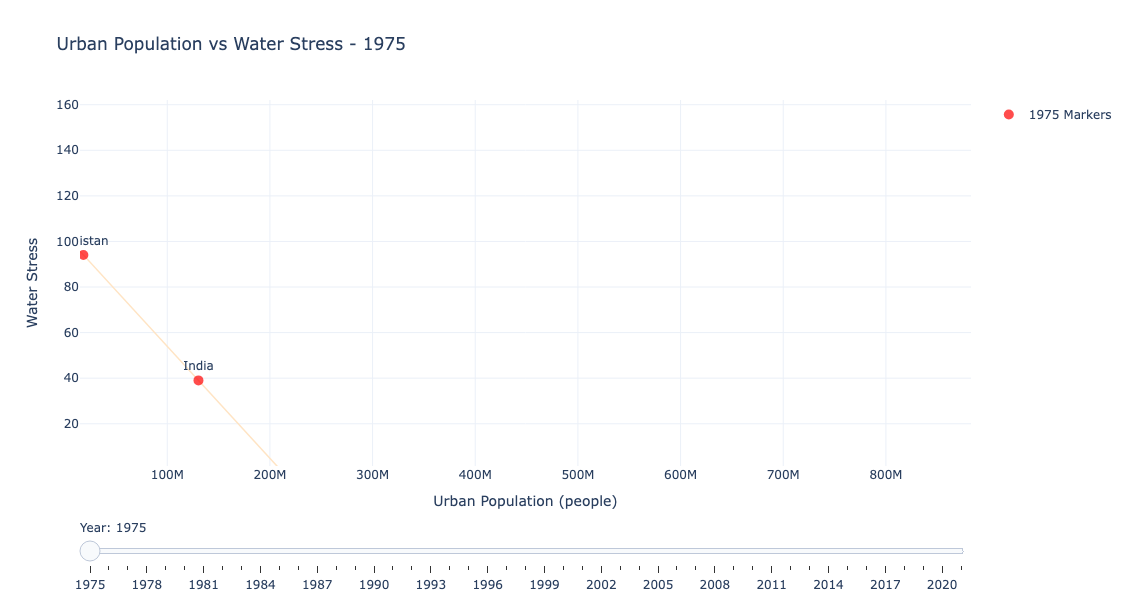

In [84]:
import plotly.graph_objects as go
import numpy as np

# Step 1: Prepare basic elements
years = sorted(merged_df['Year'].unique())

x_max = merged_df['Urban Population'].max()
y_max = merged_df['Water Stress'].max()
x_min = merged_df['Urban Population'].min()
y_min = merged_df['Water Stress'].min()

groups = ['Developed', 'Developing']
colors = {'Developed': 'blue', 'Developing': 'red'}

# Step 2: Create the initial figure and traces (1 per year + regression line)
fig = go.Figure()

for year in years:
    df_year = merged_df[merged_df['Year'] == year]

       # Regression line
    if len(df_year) > 1:
        x = df_year['Urban Population']
        y = df_year['Water Stress']
        slope, intercept = np.polyfit(x, y, 1)
        x_line = np.linspace(x_min, x_max, 100)
        y_line = slope * x_line + intercept

        fig.add_trace(go.Scatter(
            x=x_line,
            y=y_line,
            mode='lines',
            line=dict(color='bisque', width=1.5),  # subtle gray solid line
            name=f"{year} Regression",
            showlegend=False,
            visible=(year == years[0])
    ))

    # Scatter trace
    fig.add_trace(go.Scatter(
        x=df_year['Urban Population'],
        y=df_year['Water Stress'],
        mode='markers+text',
        textposition='top center',
        marker=dict(
            size=10,
            opacity=0.7,
            color=[colors[g] for g in df_year['Group']]
        ),
        name=f"{year} Markers",
        text=df_year['Country Name'],
        hovertemplate='Country Name: %{text}<br>Urban Pop: %{x}<br>Water Stress: %{y}',
        visible=(year == years[0])
    ))

# Step 3: Create the slider steps
steps = []
for i, year in enumerate(years):
    visibility = [False] * (2 * len(years))  # 2 traces per year
    visibility[i * 2] = True
    visibility[i * 2 + 1] = True

    steps.append(dict(
        method='update',
        args=[{'visible': visibility},
              {'title': f"Urban Population vs Water Stress - {year}"}],
        label=str(year)
    ))

# Step 4: Add the slider
sliders = [dict(
    active=0,
    currentvalue={"prefix": "Year: "},
    pad={"t": 50},
    steps=steps
)]

# Step 5: Final layout tweaks
fig.update_layout(
    sliders=sliders,
    title=f"Urban Population vs Water Stress - {years[0]}",
    xaxis=dict(title="Urban Population (people)", range=[x_min, x_max]),
    yaxis=dict(title="Water Stress", range=[y_min, y_max]),
    height=600,
    template="plotly_white"
)

fig.show()


### 2. colors
- Pick better, more purposeful colors that reflect the climate theme.

- Ensure consistency in how each group is colored across all years.

- Boost visual clarity without overwhelming the viewer.

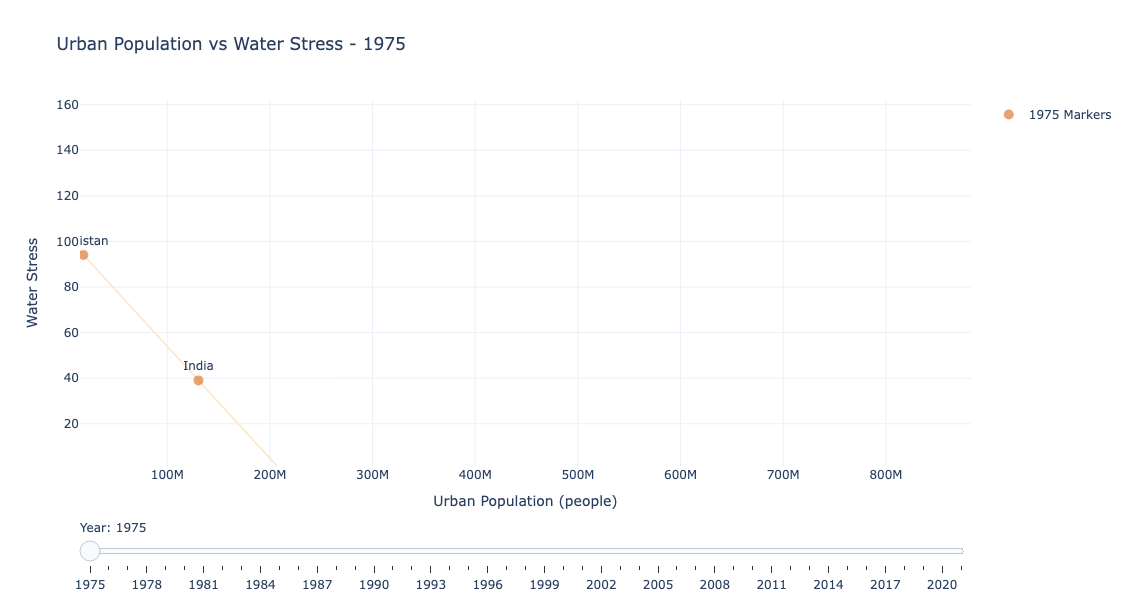

In [91]:
import plotly.graph_objects as go
import numpy as np

# Step 1: Prepare basic elements
years = sorted(merged_df['Year'].unique())

x_max = merged_df['Urban Population'].max()
y_max = merged_df['Water Stress'].max()
x_min = merged_df['Urban Population'].min()
y_min = merged_df['Water Stress'].min()

groups = ['Developed', 'Developing']
colors = {
    'Developed': '#2E8B57',   # Forest green
    'Developing': '#E07B39'   # Burnt orange
}

# Step 2: Create the initial figure and traces (1 per year + regression line)
fig = go.Figure()

for year in years:
    df_year = merged_df[merged_df['Year'] == year]

       # Regression line
    if len(df_year) > 1:
        x = df_year['Urban Population']
        y = df_year['Water Stress']
        slope, intercept = np.polyfit(x, y, 1)
        x_line = np.linspace(x_min, x_max, 100)
        y_line = slope * x_line + intercept

        fig.add_trace(go.Scatter(
            x=x_line,
            y=y_line,
            mode='lines',
            line=dict(color='bisque', width=1.5),  # subtle gray solid line
            name=f"{year} Regression",
            showlegend=False,
            visible=(year == years[0])
    ))

    # Scatter trace
    fig.add_trace(go.Scatter(
        x=df_year['Urban Population'],
        y=df_year['Water Stress'],
        mode='markers+text',
        textposition='top center',
        marker=dict(
            size=10,
            opacity=0.7,
            color=[colors[g] for g in df_year['Group']]
        ),
        name=f"{year} Markers",
        text=df_year['Country Name'],
        hovertemplate='Country Name: %{text}<br>Urban Pop: %{x}<br>Water Stress: %{y}',
        visible=(year == years[0])
    ))

# Step 3: Create the slider steps
steps = []
for i, year in enumerate(years):
    visibility = [False] * (2 * len(years))  # 2 traces per year
    visibility[i * 2] = True
    visibility[i * 2 + 1] = True

    steps.append(dict(
        method='update',
        args=[{'visible': visibility},
              {'title': f"Urban Population vs Water Stress - {year}"}],
        label=str(year)
    ))

# Step 4: Add the slider
sliders = [dict(
    active=0,
    currentvalue={"prefix": "Year: "},
    pad={"t": 50},
    steps=steps
)]

# Step 5: Final layout tweaks
fig.update_layout(
    sliders=sliders,
    title=f"Urban Population vs Water Stress - {years[0]}",
    xaxis=dict(title="Urban Population (people)", range=[x_min, x_max]),
    yaxis=dict(title="Water Stress", range=[y_min, y_max]),
    height=600,
    template="plotly_white"
)

fig.show()

#### 3. Clean and declutter
- Remove extra gridlines or lighten them (not necessary)
- Remove unnecessary axis lines or borders
- Keep only useful axis labels and a short title


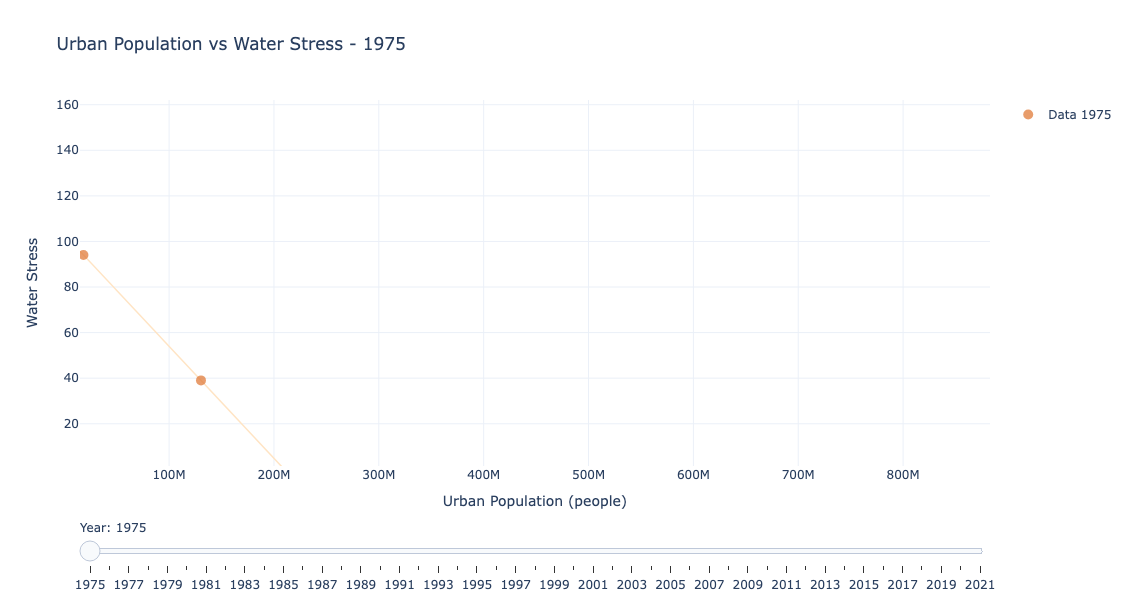

In [102]:
import plotly.graph_objects as go
import numpy as np

# Step 1: Prepare basic elements
years = sorted(merged_df['Year'].unique())

x_max = merged_df['Urban Population'].max()
y_max = merged_df['Water Stress'].max()
x_min = merged_df['Urban Population'].min()
y_min = merged_df['Water Stress'].min()

groups = ['Developed', 'Developing']
colors = {
    'Developed': '#2E8B57',   # Forest green
    'Developing': '#E07B39'   # Burnt orange
}

# Step 2: Create the initial figure and traces (1 per year + regression line)
fig = go.Figure()

for year in years:
    df_year = merged_df[merged_df['Year'] == year]

       # Regression line
    if len(df_year) > 1:
        x = df_year['Urban Population']
        y = df_year['Water Stress']
        slope, intercept = np.polyfit(x, y, 1)
        x_line = np.linspace(x_min, x_max, 100)
        y_line = slope * x_line + intercept

        fig.add_trace(go.Scatter(
            x=x_line,
            y=y_line,
            mode='lines',
            line=dict(color='bisque', width=1.5),  # subtle gray solid line
            name=f"{year} Regression",
            showlegend=False,
            visible=(year == years[0])
    ))

    # Scatter trace
    fig.add_trace(go.Scatter(
        x=df_year['Urban Population'],
        y=df_year['Water Stress'],
        mode='markers',  # ⛔️ Removed +text
        marker=dict(
            size=10,
            opacity=0.75,
            color=[colors[g] for g in df_year['Group']]
        ),
        name=f"Data {year}",
        hovertemplate='Country: %{text}<br>Urban Pop: %{x}<br>Water Stress: %{y}',
        text=df_year['Country Name'],  # ✅ Moved to hover only
        visible=(year == years[0])
    ))


# Step 3: Create the slider steps
steps = []
for i, year in enumerate(years):
    visibility = [False] * (2 * len(years))  # 2 traces per year
    visibility[i * 2] = True
    visibility[i * 2 + 1] = True

    steps.append(dict(
        method='update',
        args=[{'visible': visibility},
              {'title': f"Urban Population vs Water Stress - {year}"}],
        label=str(year)
    ))

# Step 4: Add the slider
sliders = [dict(
    active=0,
    currentvalue={"prefix": "Year: "},
    pad={"t": 50},
    steps=steps
)]

# Step 5: Final layout tweaks
fig.update_layout(
    sliders=sliders,
    title=f"Urban Population vs Water Stress - {years[0]}",
    xaxis=dict(title="Urban Population (people)", range=[x_min, x_max]),
    yaxis=dict(title="Water Stress", range=[y_min, y_max]),
    height=600,
    template="plotly_white"
)

fig.show()

#### 4. Title 
change it so it changes the year and regression line slope as you move the curser 

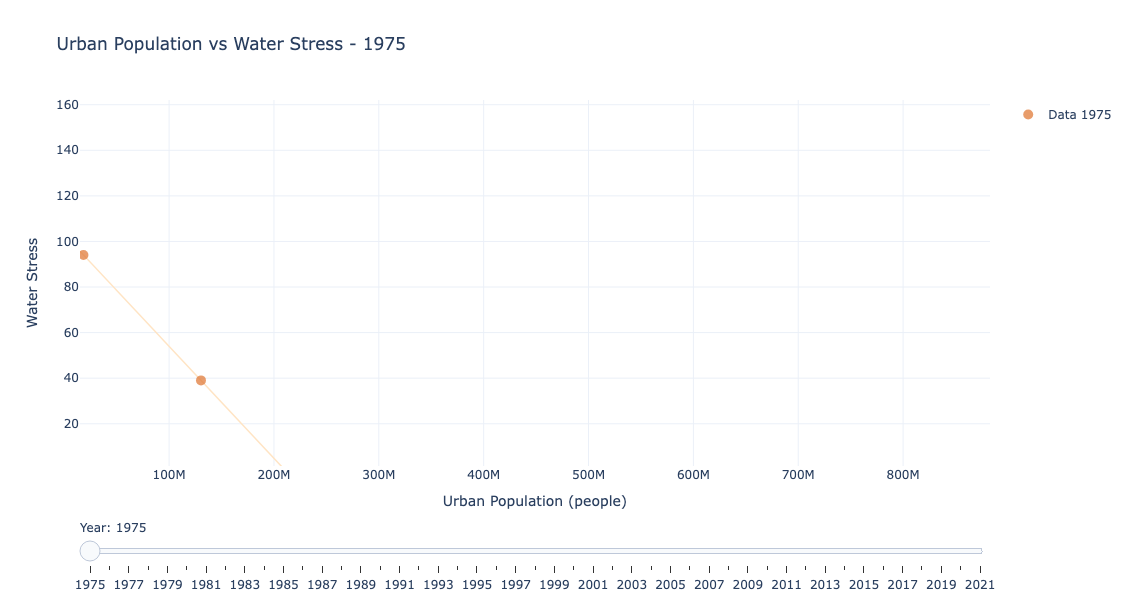

In [105]:
import plotly.graph_objects as go
import numpy as np

# Step 1: Prepare basic elements
years = sorted(merged_df['Year'].unique())

x_max = merged_df['Urban Population'].max()
y_max = merged_df['Water Stress'].max()
x_min = merged_df['Urban Population'].min()
y_min = merged_df['Water Stress'].min()

groups = ['Developed', 'Developing']
colors = {
    'Developed': '#2E8B57',   # Forest green
    'Developing': '#E07B39'   # Burnt orange
}

# Step 2: Create the initial figure and traces (1 per year + regression line)
fig = go.Figure()

for year in years:
    df_year = merged_df[merged_df['Year'] == year]
    r_values[year] = r_value

       # Regression line
    if len(df_year) > 1:
        x = df_year['Urban Population']
        y = df_year['Water Stress']
        slope, intercept = np.polyfit(x, y, 1)
        x_line = np.linspace(x_min, x_max, 100)
        y_line = slope * x_line + intercept

        fig.add_trace(go.Scatter(
            x=x_line,
            y=y_line,
            mode='lines',
            line=dict(color='bisque', width=1.5),  # subtle gray solid line
            name=f"{year} Regression",
            showlegend=False,
            visible=(year == years[0])
    ))

    # Scatter trace
    fig.add_trace(go.Scatter(
        x=df_year['Urban Population'],
        y=df_year['Water Stress'],
        mode='markers',  #  Removed +text
        marker=dict(
            size=10,
            opacity=0.75,
            color=[colors[g] for g in df_year['Group']]
        ),
        name=f"Data {year}",
        hovertemplate='Country: %{text}<br>Urban Pop: %{x}<br>Water Stress: %{y}',
        text=df_year['Country Name'],  # Moved to hover only
        visible=(year == years[0])
    ))


# Step 3: Create the slider steps
steps = []
for i, year in enumerate(years):
    visibility = [False] * (2 * len(years))  # 2 traces per year
    visibility[i * 2] = True
    visibility[i * 2 + 1] = True

    steps.append(dict(
        method='update',
        args=[{'visible': visibility},
              {'title': f"Urban Population vs Water Stress - {year}<br>(r = {r_values[year]:.2f})"}],
        label=str(year)
    ))

# Step 4: Add the slider
sliders = [dict(
    active=0,
    currentvalue={"prefix": "Year: "},
    pad={"t": 50},
    steps=steps
)]

# Step 5: Final layout tweaks
fig.update_layout(
    sliders=sliders,
    title=f"Urban Population vs Water Stress - {years[0]}",
    xaxis=dict(title="Urban Population (people)", range=[x_min, x_max]),
    yaxis=dict(title="Water Stress", range=[y_min, y_max]),
    height=600,
    template="plotly_white"
)

fig.show()

#### 5. consistent size and shape 

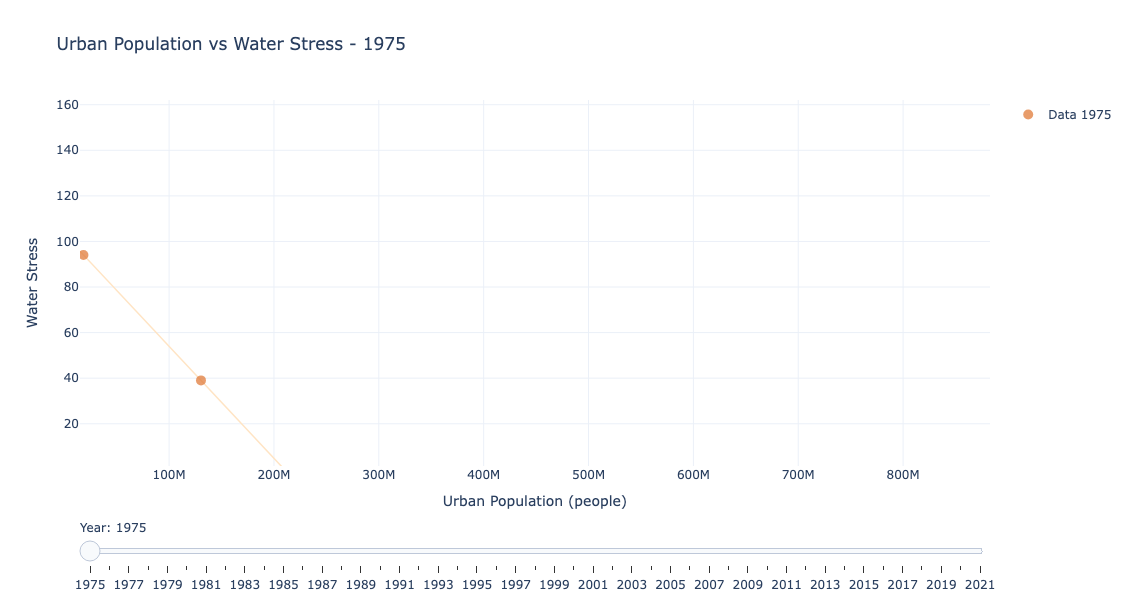

In [106]:
import plotly.graph_objects as go
import numpy as np

# Step 1: Prepare basic elements
years = sorted(merged_df['Year'].unique())

x_max = merged_df['Urban Population'].max()
y_max = merged_df['Water Stress'].max()
x_min = merged_df['Urban Population'].min()
y_min = merged_df['Water Stress'].min()

groups = ['Developed', 'Developing']
colors = {
    'Developed': '#2E8B57',   # Forest green
    'Developing': '#E07B39'   # Burnt orange
}

# Step 2: Create the initial figure and traces (1 per year + regression line)
fig = go.Figure()

for year in years:
    df_year = merged_df[merged_df['Year'] == year]
    r_values[year] = r_value

       # Regression line
    if len(df_year) > 1:
        x = df_year['Urban Population']
        y = df_year['Water Stress']
        slope, intercept = np.polyfit(x, y, 1)
        x_line = np.linspace(x_min, x_max, 100)
        y_line = slope * x_line + intercept

        fig.add_trace(go.Scatter(
            x=x_line,
            y=y_line,
            mode='lines',
            line=dict(color='bisque', width=1.5),  # subtle gray solid line
            name=f"{year} Regression",
            showlegend=False,
            visible=(year == years[0])
    ))

    # Scatter trace
    fig.add_trace(go.Scatter(
        x=df_year['Urban Population'],
        y=df_year['Water Stress'],
        mode='markers',
        marker=dict(
            size=10,
            opacity=0.75,
            color=[colors[g] for g in df_year['Group']]
        ),
        name=f"Data {year}",
        text=df_year['Country Name'],
        customdata=df_year[['Group']],  # ✅ Needed to show group
        hovertemplate=(
            'Country: %{text}<br>'
            'Group: %{customdata[0]}<br>'
            'Urban Population: %{x:.2f}<br>'
            'Water Stress (%): %{y:.2f}<extra></extra>'
        ),
        visible=(year == years[0])
))



# Step 3: Create the slider steps
steps = []
for i, year in enumerate(years):
    visibility = [False] * (2 * len(years))  # 2 traces per year
    visibility[i * 2] = True
    visibility[i * 2 + 1] = True

    steps.append(dict(
        method='update',
        args=[{'visible': visibility},
              {'title': f"Urban Population vs Water Stress - {year}<br>(r = {r_values[year]:.2f})"}],
        label=str(year)
    ))

# Step 4: Add the slider
sliders = [dict(
    active=0,
    currentvalue={"prefix": "Year: "},
    pad={"t": 50},
    steps=steps
)]

# Step 5: Final layout tweaks
fig.update_layout(
    sliders=sliders,
    title=f"Urban Population vs Water Stress - {years[0]}",
    xaxis=dict(title="Urban Population (people)", range=[x_min, x_max]),
    yaxis=dict(title="Water Stress", range=[y_min, y_max]),
    height=600,
    template="plotly_white"
)

fig.show()